In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import statsmodels.api as sm
from sklearn.metrics import log_loss
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import DecisionBoundaryDisplay
from tqdm import tqdm

(918, 12)
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.00

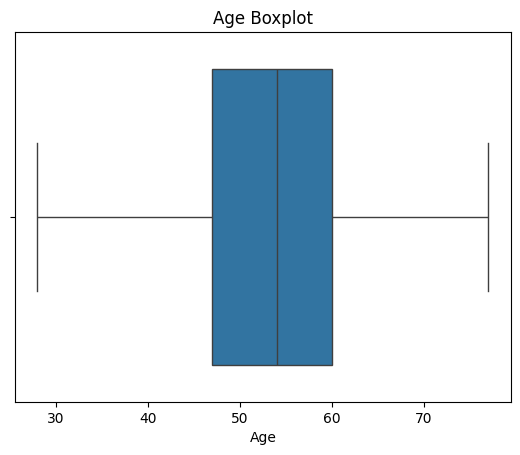

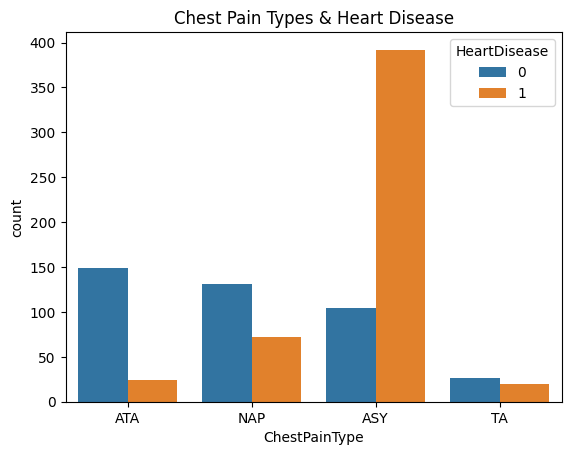

<Axes: xlabel='Age', ylabel='MaxHR'>

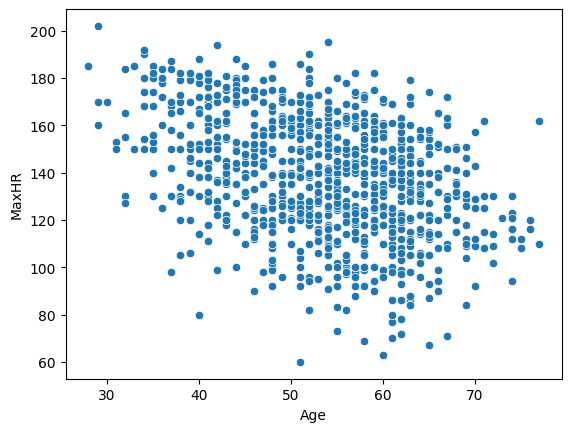

In [150]:
df = pd.read_csv("/Users/felixfautsch/VS_Python/heart_desease_detection/heart.csv.xls")
print(df.shape)
print(df.columns)
#print(df.head())
print(df.describe())
#print(df.info())
print(df["HeartDisease"].value_counts(normalize=True))
sns.boxplot(x=df["Age"]).set(title="Age Boxplot")
plt.show()
sns.countplot(x=df["ChestPainType"],hue=df["HeartDisease"],stat='count').set(title="Chest Pain Types & Heart Disease")
plt.show()
sns.scatterplot(data=df, x='Age', y='MaxHR')

Accuracy: 0.8369565217391305
Precision: 0.9230769230769231
Recall: 0.8135593220338984
F1 Score: 0.8648648648648649


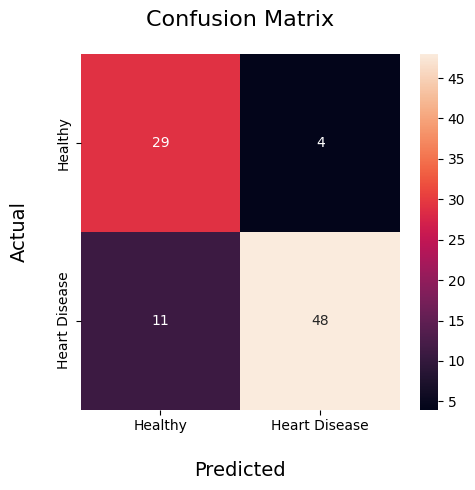

[[ 0.01220904  0.00199356 -0.00486388  0.94958703 -0.00590028  0.45727207
   1.16836396 -1.28218278 -1.33889853 -0.86380045 -0.16232281 -0.38795613
   1.07993351  1.2193996  -1.07501814]]
(1, 15)
[-0.45901583]
              Feature  Coefficient (b)
0                 Age         0.012209
1           RestingBP         0.001994
2         Cholesterol        -0.004864
3           FastingBS         0.949587
4               MaxHR        -0.005900
5             Oldpeak         0.457272
6               Sex_M         1.168364
7   ChestPainType_ATA        -1.282183
8   ChestPainType_NAP        -1.338899
9    ChestPainType_TA        -0.863800
10  RestingECG_Normal        -0.162323
11      RestingECG_ST        -0.387956
12   ExerciseAngina_Y         1.079934
13      ST_Slope_Flat         1.219400
14        ST_Slope_Up        -1.075018

Sorted by absolute impact:
              Feature  Coefficient (b)
8   ChestPainType_NAP        -1.338899
7   ChestPainType_ATA        -1.282183
13      ST_Slope_Flat

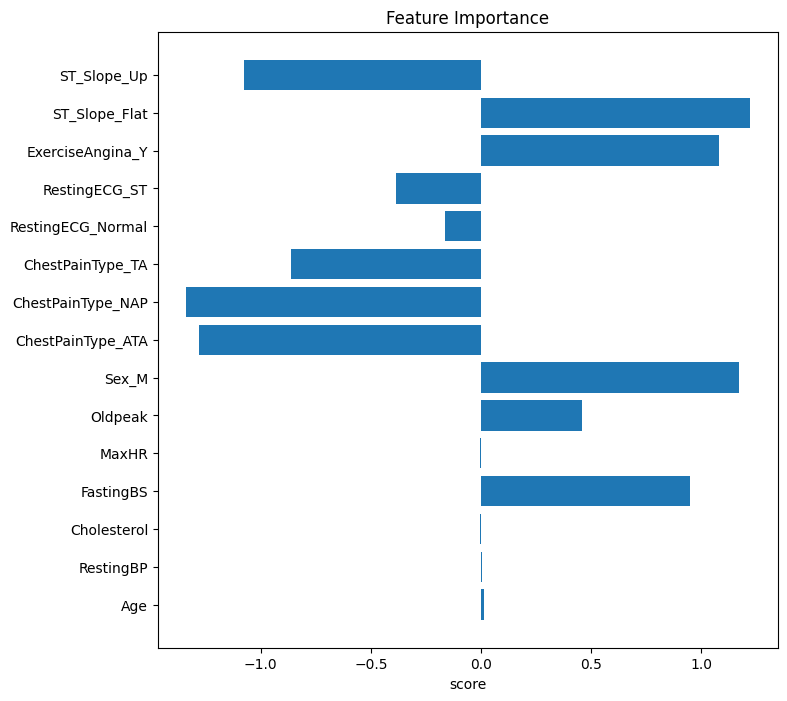


Number of Features: 1
Selected: ['ST_Slope_Up']
Accuracy : 0.8152
Precision: 0.92
Recall   : 0.7797
F1 Score : 0.844

Number of Features: 2
Selected: ['MaxHR', 'ST_Slope_Up']
Accuracy : 0.8043
Precision: 0.9184
Recall   : 0.7627
F1 Score : 0.8333

Number of Features: 3
Selected: ['FastingBS', 'MaxHR', 'ST_Slope_Up']
Accuracy : 0.8261
Precision: 0.9216
Recall   : 0.7966
F1 Score : 0.8545

Number of Features: 4
Selected: ['FastingBS', 'MaxHR', 'ChestPainType_ATA', 'ST_Slope_Up']
Accuracy : 0.837
Precision: 0.94
Recall   : 0.7966
F1 Score : 0.8624

Number of Features: 5
Selected: ['FastingBS', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ST_Slope_Up']
Accuracy : 0.8696
Precision: 0.9434
Recall   : 0.8475
F1 Score : 0.8929

Number of Features: 6
Selected: ['FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ST_Slope_Up']
Accuracy : 0.8152
Precision: 0.9375
Recall   : 0.7627
F1 Score : 0.8411

Number of Features: 7
Selected: ['FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainTyp

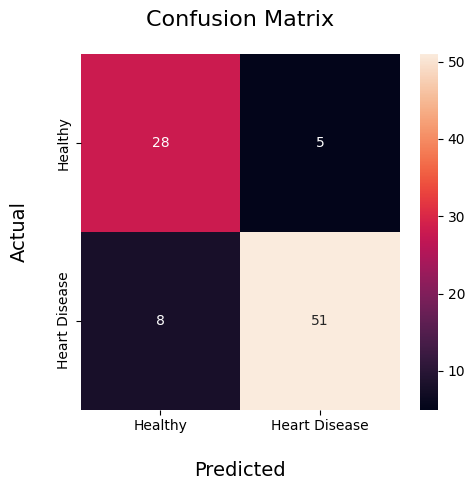

'\nselected_2d_features = [best_features[0], best_features[2]]\nx_2d = x[selected_2d_features]\nx_val_2d = x_val[selected_2d_features]\nmodel = SVC(kernel=\'linear\', C=0.1)\nmodel.fit(x_2d, labels)\nscatter = ax.scatter(x_2d.iloc[:, 0], x_2d.iloc[:, 1], s=150, c=labels, edgecolors="k")\ndef plot_training_data_with_decision_boundary(kernel, X, y, clf):\n    fig, ax = plt.subplots(figsize=(6, 5))\n    \n    # Plot decision boundary and margins\n    DecisionBoundaryDisplay.from_estimator(\n        clf, X, response_method="predict", plot_method="pcolormesh", ax=ax, alpha=0.3\n    )\n    DecisionBoundaryDisplay.from_estimator(\n        clf,\n        X,\n        response_method="decision_function",\n        plot_method="contour",\n        ax=ax,\n        levels=[-1, 0, 1],\n        colors=["k", "k", "k"],\n        linestyles=["--", "-", "--"],\n    )\n\n    # Plot support vectors\n    ax.scatter(\n        clf.support_vectors_[:, 0],\n        clf.support_vectors_[:, 1],\n        s=150,\n    

In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
labels = train_df.iloc[:,11]
x = train_df.iloc[:,:11]
x = pd.get_dummies(x,drop_first=True) # drop first is important for correct dummy variable handling (baseline gets excluded just like we learnt)


# ------- Logistic Regression -------
model = LogisticRegression(max_iter=10000,class_weight='balanced')
model.fit(x, labels)
y_labels = val_df.iloc[:,11]
x_val = val_df.iloc[:,:11]
x_val = pd.get_dummies(x_val,drop_first=True)
y_pred = model.predict(x_val)
print("Accuracy:", accuracy_score(y_labels, y_pred))
print("Precision:", precision_score(y_labels, y_pred))
print("Recall:", recall_score(y_labels, y_pred))
print("F1 Score:", f1_score(y_labels, y_pred))

cm = confusion_matrix(y_labels,y_pred)
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.heatmap(cm,annot=True,xticklabels=['Healthy', 'Heart Disease'],yticklabels=['Healthy', 'Heart Disease'])
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print(model.coef_) 
print(model.coef_.shape) 
print(model.intercept_)

feature_names = x.columns
coefficients = model.coef_[0]  
intercept = model.intercept_[0]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (b)': coefficients
})
print(coef_df)
print("\nSorted by absolute impact:")
print(coef_df.reindex(coef_df['Coefficient (b)'].abs().sort_values(ascending=False).index))
print(f"\nIntercept (bias term): {intercept}")

importance = model.coef_.flatten()
plt.figure(figsize=(8,8))
plt.barh(x.columns,importance)
plt.xlabel("score")
plt.title("Feature Importance")
plt.show()


# Fowrard Stepwise Feature Selection guided by accuracy score
model_template = LogisticRegression(max_iter=10000, class_weight='balanced')
x_val_raw = val_df.iloc[:, :11]
x_val_raw = pd.get_dummies(x_val_raw, drop_first=True)
y_labels = val_df.iloc[:, 11]
best_score = 0
best_features = []
#for i in tqdm(range(1, x.shape[1])):  
for i in range(1, x.shape[1]):  
    model = LogisticRegression(max_iter=10000, class_weight='balanced') 
    forward = SequentialFeatureSelector(model, n_features_to_select=i, scoring='accuracy')
    forward.fit(x, labels)
    selected_columns = x.columns[forward.get_support()]
    x_selected = x[selected_columns]
    model.fit(x_selected, labels)
    x_val = x_val_raw.reindex(columns=selected_columns, fill_value=0)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_labels, y_pred)
    if accuracy > best_score:
        best_score = accuracy
        best_features = list(selected_columns)
    print(f"\nNumber of Features: {i}")
    print(f"Selected: {list(selected_columns)}")
    print("Accuracy :", round(accuracy_score(y_labels, y_pred), 4))
    print("Precision:", round(precision_score(y_labels, y_pred), 4))
    print("Recall   :", round(recall_score(y_labels, y_pred), 4))
    print("F1 Score :", round(f1_score(y_labels, y_pred), 4))
print(f"\nBest Model with features: {best_features}")


# ------- Test -------             
test_entry = pd.DataFrame([{
    'Age': 20,
    'Sex': 'M',            
    'ChestPainType': 'ASY',
    'RestingBP': 160,
    'Cholesterol': 180,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 156,
    'ExerciseAngina': 'N',
    'Oldpeak': 2.3,
    'ST_Slope': 'Flat'
}])

test_entry_encoded = pd.get_dummies(test_entry)
test_entry_encoded = test_entry_encoded.reindex(columns=selected_columns, fill_value=0)
prediction = model.predict(test_entry_encoded)
print("Prediction:", prediction[0])


# ------- SVM -------
print(100*"=")
model = SVC(kernel = 'linear',C = 0.1)
x = x.reindex(columns=selected_columns, fill_value=0)
model.fit(x, labels)
x_val = x_val.reindex(columns=selected_columns, fill_value=0)
y_pred = model.predict(x_val)
print("Accuracy:", accuracy_score(y_labels, y_pred))
print("Precision:", precision_score(y_labels, y_pred))
print("Recall:", recall_score(y_labels, y_pred))
print("F1 Score:", f1_score(y_labels, y_pred))

cm = confusion_matrix(y_labels,y_pred)
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.heatmap(cm,annot=True,xticklabels=['Healthy', 'Heart Disease'],yticklabels=['Healthy', 'Heart Disease'])
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

'''
selected_2d_features = [best_features[0], best_features[2]]
x_2d = x[selected_2d_features]
x_val_2d = x_val[selected_2d_features]
model = SVC(kernel='linear', C=0.1)
model.fit(x_2d, labels)
scatter = ax.scatter(x_2d.iloc[:, 0], x_2d.iloc[:, 1], s=150, c=labels, edgecolors="k")
def plot_training_data_with_decision_boundary(kernel, X, y, clf):
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Plot decision boundary and margins
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", plot_method="pcolormesh", ax=ax, alpha=0.3
    )
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="decision_function",
        plot_method="contour",
        ax=ax,
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=150,
        facecolors="none",
        edgecolors="k",
    )

    # Plot data
    #scatter = ax.scatter(x_2d.iloc[:, 0], x_2d.iloc[:, 1], s=150, c=labels, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Class")
    ax.set_title(f"SVM Decision Boundary ({kernel} kernel)")
    plt.tight_layout()
    plt.show()
plot_training_data_with_decision_boundary("linear", X=x_2d, clf=model, y=labels)
'''
